In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%config InlineBackend.figure_format = 'retina'
# Initialize random number generator
RANDOM_SEED = 8927
np.random.seed(RANDOM_SEED)
az.style.use('arviz-darkgrid')

$Y \sim Normal(\mu,\sigma)$ <br>
$\mu = \alpha + \vec{\beta}\textbf{X}$ <br>

In [3]:
#true:
alpha = 1
beta = np.array([1,2.5]).reshape(2,1)
sigma = 1

data_size = 50
X = np.random.randn(2,data_size)
X1 = X[0,:]
X2 = X[1,:]
Y = alpha + beta.T @ X + np.random.randn(data_size) * sigma

In [4]:

beta.T

X

beta.T@X


array([[-0.23828155, -5.31929662,  0.58772591,  3.38474666, -1.84847912,
        -3.27388608,  1.44517007, -2.82271028,  0.8130028 ,  0.20071885,
         1.96540575, -1.94642635,  3.53277207,  4.95012929,  0.54571041,
         0.40556955, -3.31073375,  0.06007106, -1.5719445 , -2.34052617,
         1.3051561 , -0.34929759,  2.69621624,  3.479327  , -0.1391882 ,
        -5.68926054, -4.54758354, -2.57465216, -0.5368546 , -4.4238059 ,
         4.42624937, -0.21966525, -1.07300383, -0.42070301, -2.10962672,
         0.04076919,  0.57667464, -4.01271848, -1.8687166 , -4.05349898,
         0.86449375,  2.01107421, -1.85134181, -2.24130689,  2.38068964,
         0.94853669, -2.13006293, -3.21977767,  1.89436981,  0.08519791]])

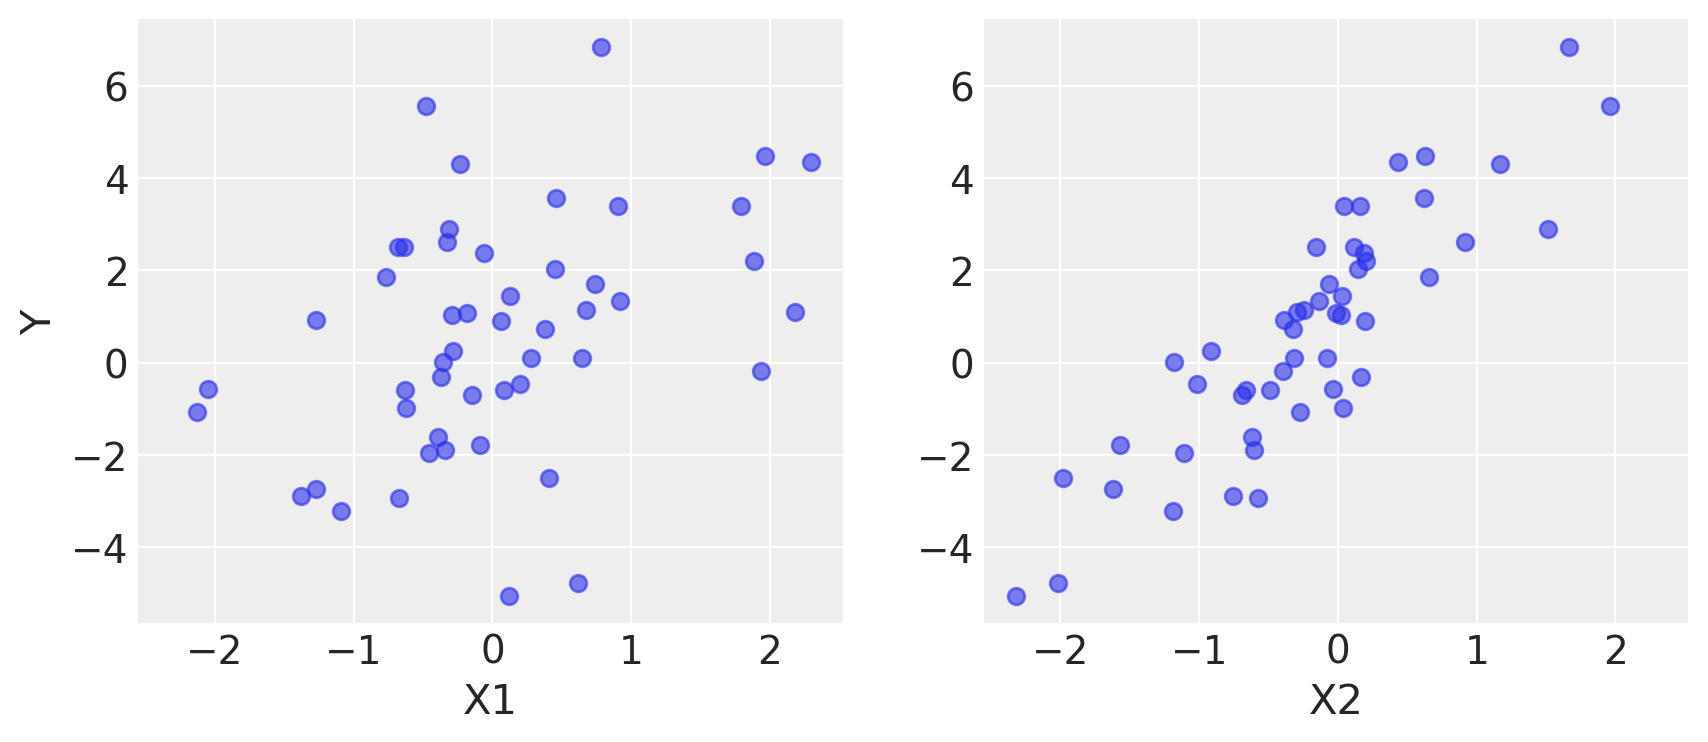

In [5]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10, 4))
axes[0].scatter(X1, Y, alpha=0.6)
axes[1].scatter(X2, Y, alpha=0.6)
axes[0].set_ylabel("Y")
axes[0].set_xlabel("X1")
axes[1].set_xlabel("X2");

In [6]:
import pymc3 as pm

print("Running on PyMC3 v{}".format(pm.__version__))

Running on PyMC3 v3.8


In [7]:
basic_model = pm.Model()
with basic_model:
    alpha = pm.Normal("alpha",mu=0,sigma=10)
    beta = pm.Normal("beta",mu=[0,0],sigma = 10,shape=2)
    sigma = pm.HalfNormal("sigma", sigma = 10)
    
    mu = alpha + beta@X
    
    y = pm.Normal("y", mu = mu, sigma = sigma, observed=Y)

In [8]:

map_estimate = pm.find_MAP(model=basic_model)
map_estimate

logp = -84.358, ||grad|| = 1.3847: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 1699.76it/s]


{'alpha': array(1.10583585),
 'beta': array([0.68922782, 2.42327462]),
 'sigma_log__': array(0.02307248),
 'sigma': array(1.02334071)}

In [9]:
map_estimate = pm.find_MAP(model=basic_model, method="powell")
map_estimate

  0%|                                                                                                                                                                                   | 0/5000 [00:00<?, ?it/s]C:\ProgramData\Miniconda3\lib\site-packages\scipy\optimize\_minimize.py:518: RuntimeWarning: Method powell does not use gradient information (jac).
  RuntimeWarning)
logp = -84.342, ||grad|| = 0.018002: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 152/152 [00:00<00:00, 1853.59it/s]


{'alpha': array(1.10575703),
 'beta': array([0.68959465, 2.42298724]),
 'sigma_log__': array(0.02308974),
 'sigma': array(1.02335837)}

In [10]:
basic_model = pm.Model()

with basic_model:

    # Priors for unknown model parameters
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta = pm.Normal("beta", mu=0, sigma=10, shape=2)
    sigma = pm.HalfNormal("sigma", sigma=1)

    # Expected value of outcome
    mu = alpha + beta[0] * X1 + beta[1] * X2

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=Y)

In [11]:
map_estimate = pm.find_MAP(model=basic_model)
map_estimate

logp = -82.68, ||grad|| = 3.3029: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 1899.87it/s]


{'alpha': array(1.1058461),
 'beta': array([0.68921831, 2.42328842]),
 'sigma_log__': array(0.01302029),
 'sigma': array(1.01310542)}

In [12]:
with basic_model:
    # draw 500 posterior samples
    trace = pm.sample(500,chains=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sigma, beta, alpha]
Sampling 2 chains, 0 divergences: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:05<00:00, 386.92draws/s]


In [13]:
trace["alpha"][-10:]

array([1.08265129, 1.04824575, 1.17838329, 0.97659852, 1.21263557,
       0.96703094, 0.98527993, 1.07893247, 0.88172984, 1.38501352])

C:\ProgramData\Miniconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\ProgramData\Miniconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\ProgramData\Miniconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\ProgramData\Miniconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument bac

array([[<AxesSubplot:title={'center':'alpha'}>,
        <AxesSubplot:title={'center':'alpha'}>],
       [<AxesSubplot:title={'center':'beta\n0'}>,
        <AxesSubplot:title={'center':'beta\n0'}>],
       [<AxesSubplot:title={'center':'beta\n1'}>,
        <AxesSubplot:title={'center':'beta\n1'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

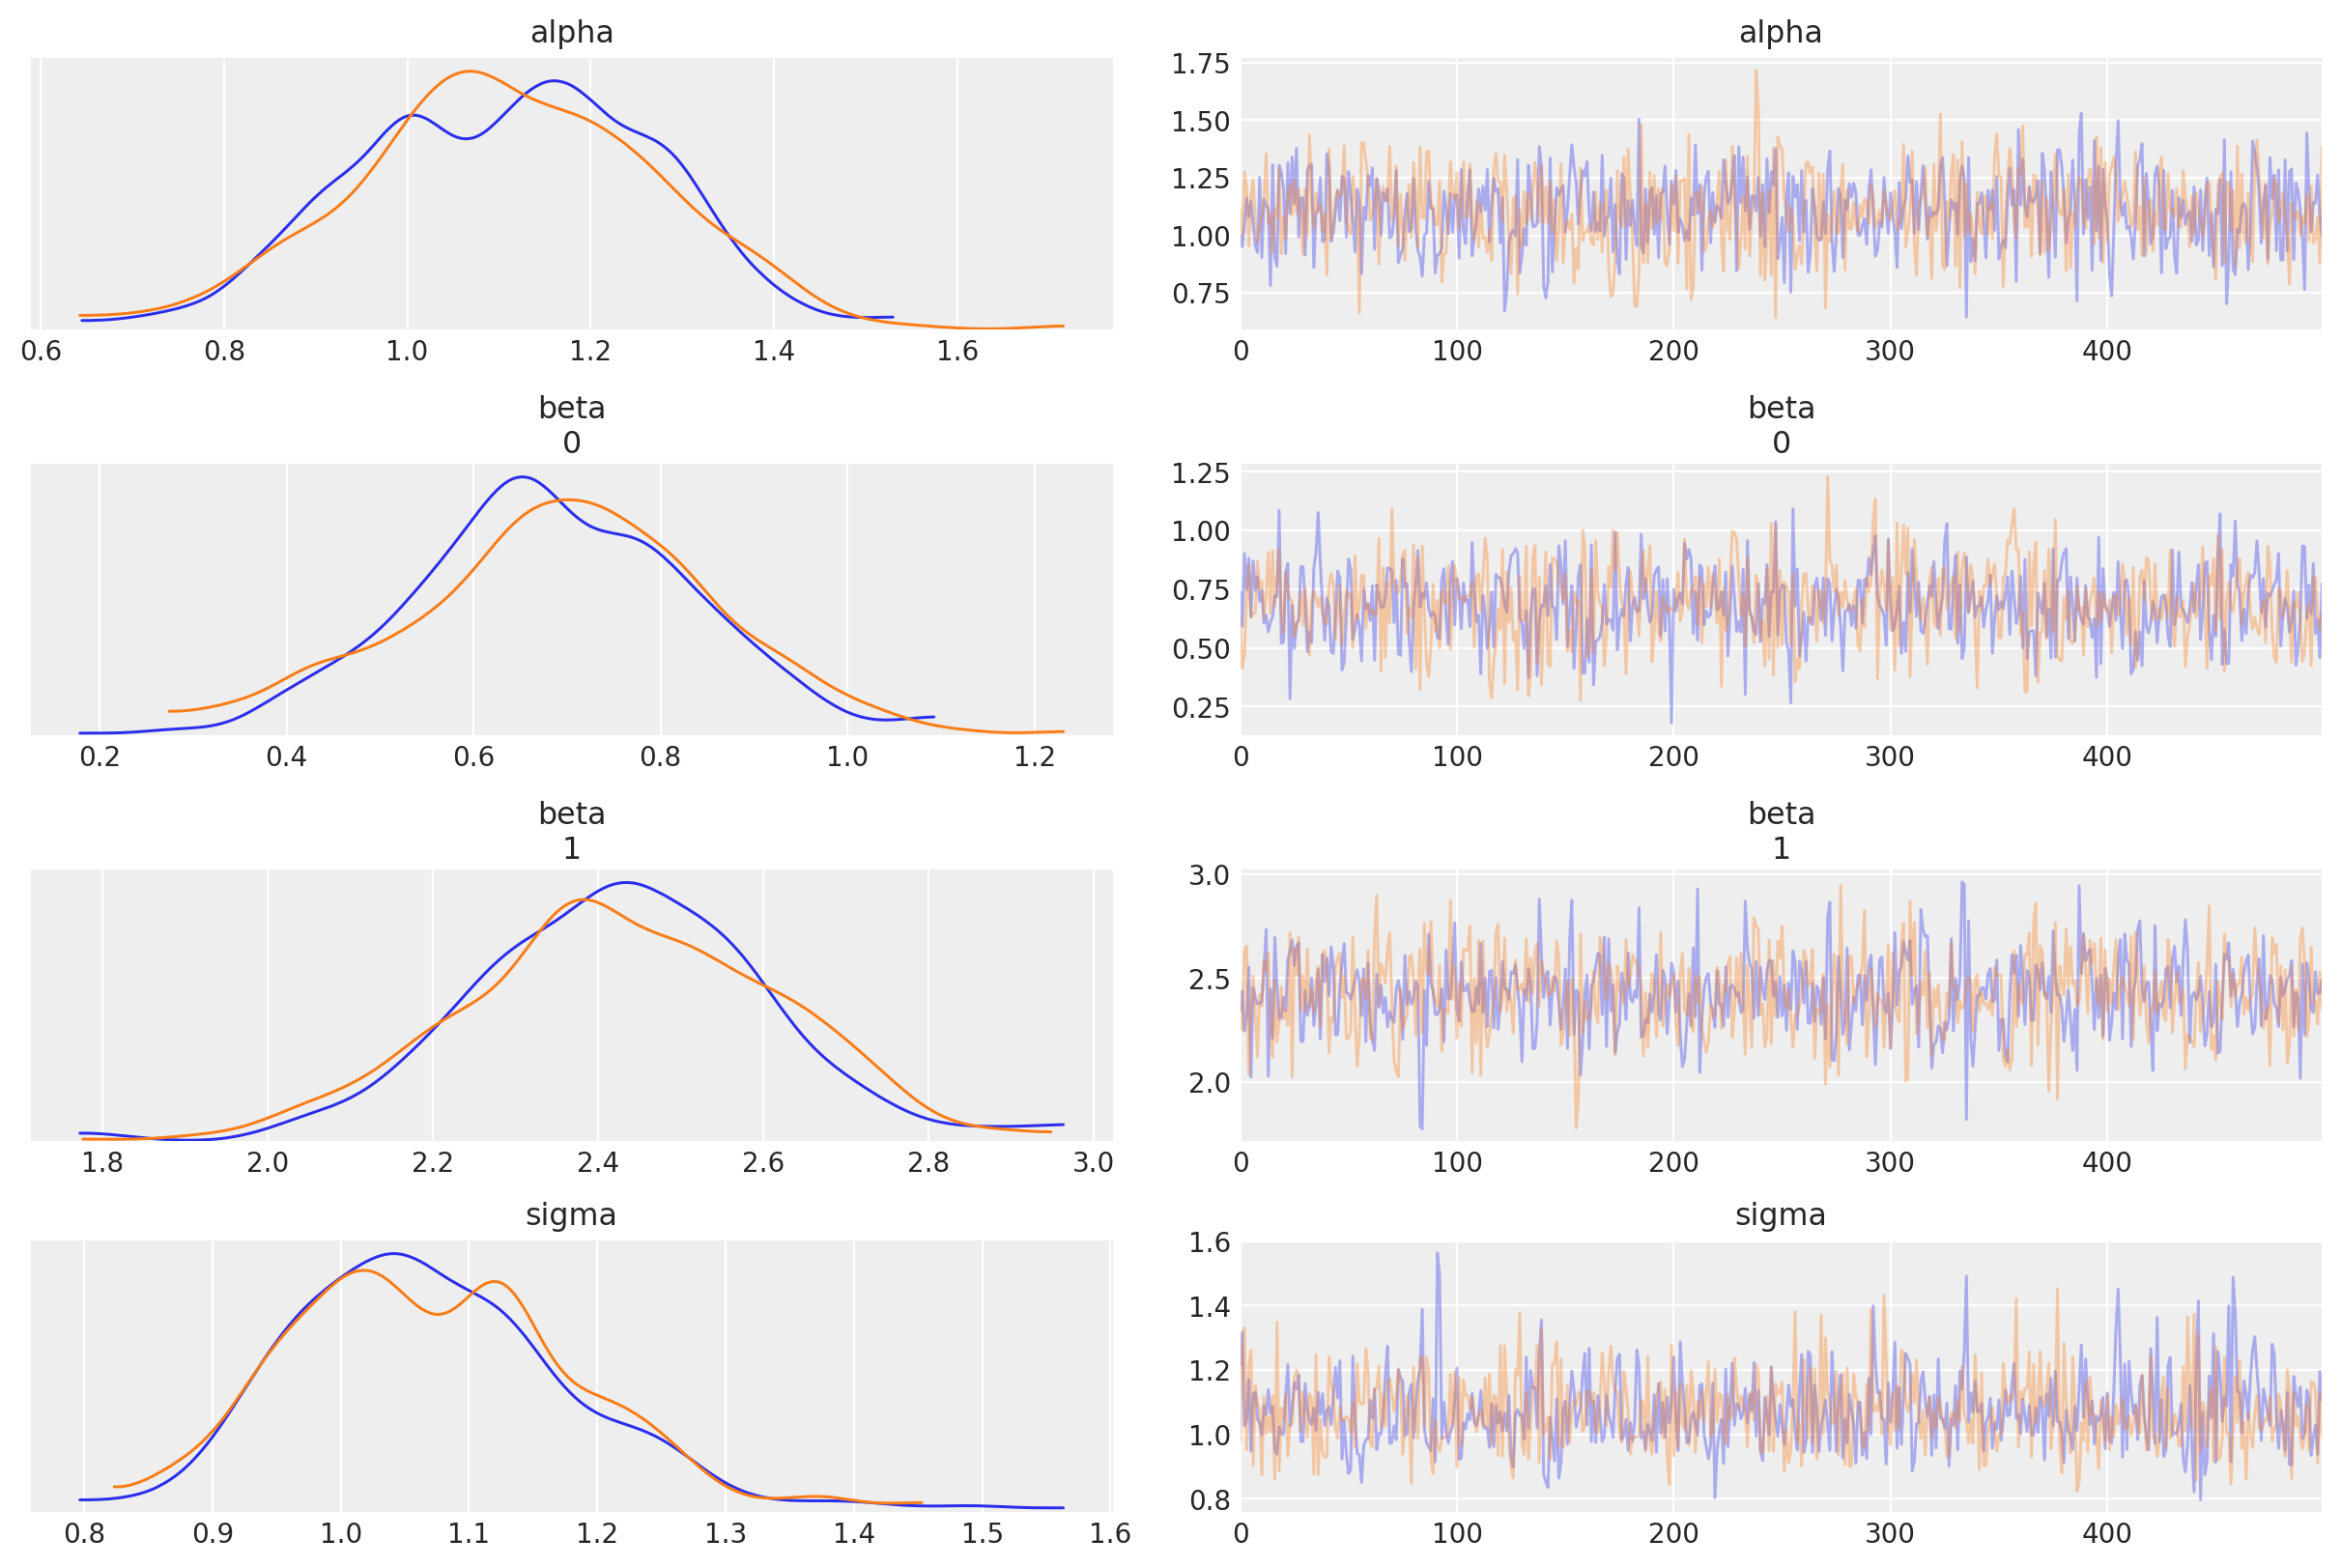

In [14]:
az.plot_trace(trace)

In [15]:
az.summary(trace, round_to=2)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alpha,1.10,0.16,0.83,1.40,0.00,0.0,1126.60,1123.65,1134.16,719.93,1.0
beta[0],0.69,0.15,0.39,0.96,0.01,0.0,935.31,894.44,937.52,722.80,1.0
beta[1],2.42,0.18,2.10,2.78,0.01,0.0,936.86,936.86,944.79,720.65,1.0
sigma,1.07,0.11,0.88,1.28,0.00,0.0,971.35,949.94,934.20,645.43,1.0


### Case Study S&P 500 price

In [16]:
import pandas as pd

returns = pd.read_csv(
    pm.get_data("SP500.csv"), parse_dates=True, index_col=0, usecols=["Date", "change"]
)
len(returns) 

2906

In [17]:
returns.head(10)

,change
Date,
2008-05-02,0.003230
2008-05-05,-0.004544
2008-05-06,0.007623
2008-05-07,-0.018280
2008-05-08,0.003663
2008-05-09,-0.006748
2008-05-12,0.010960
2008-05-13,-0.000385
2008-05-14,0.003998


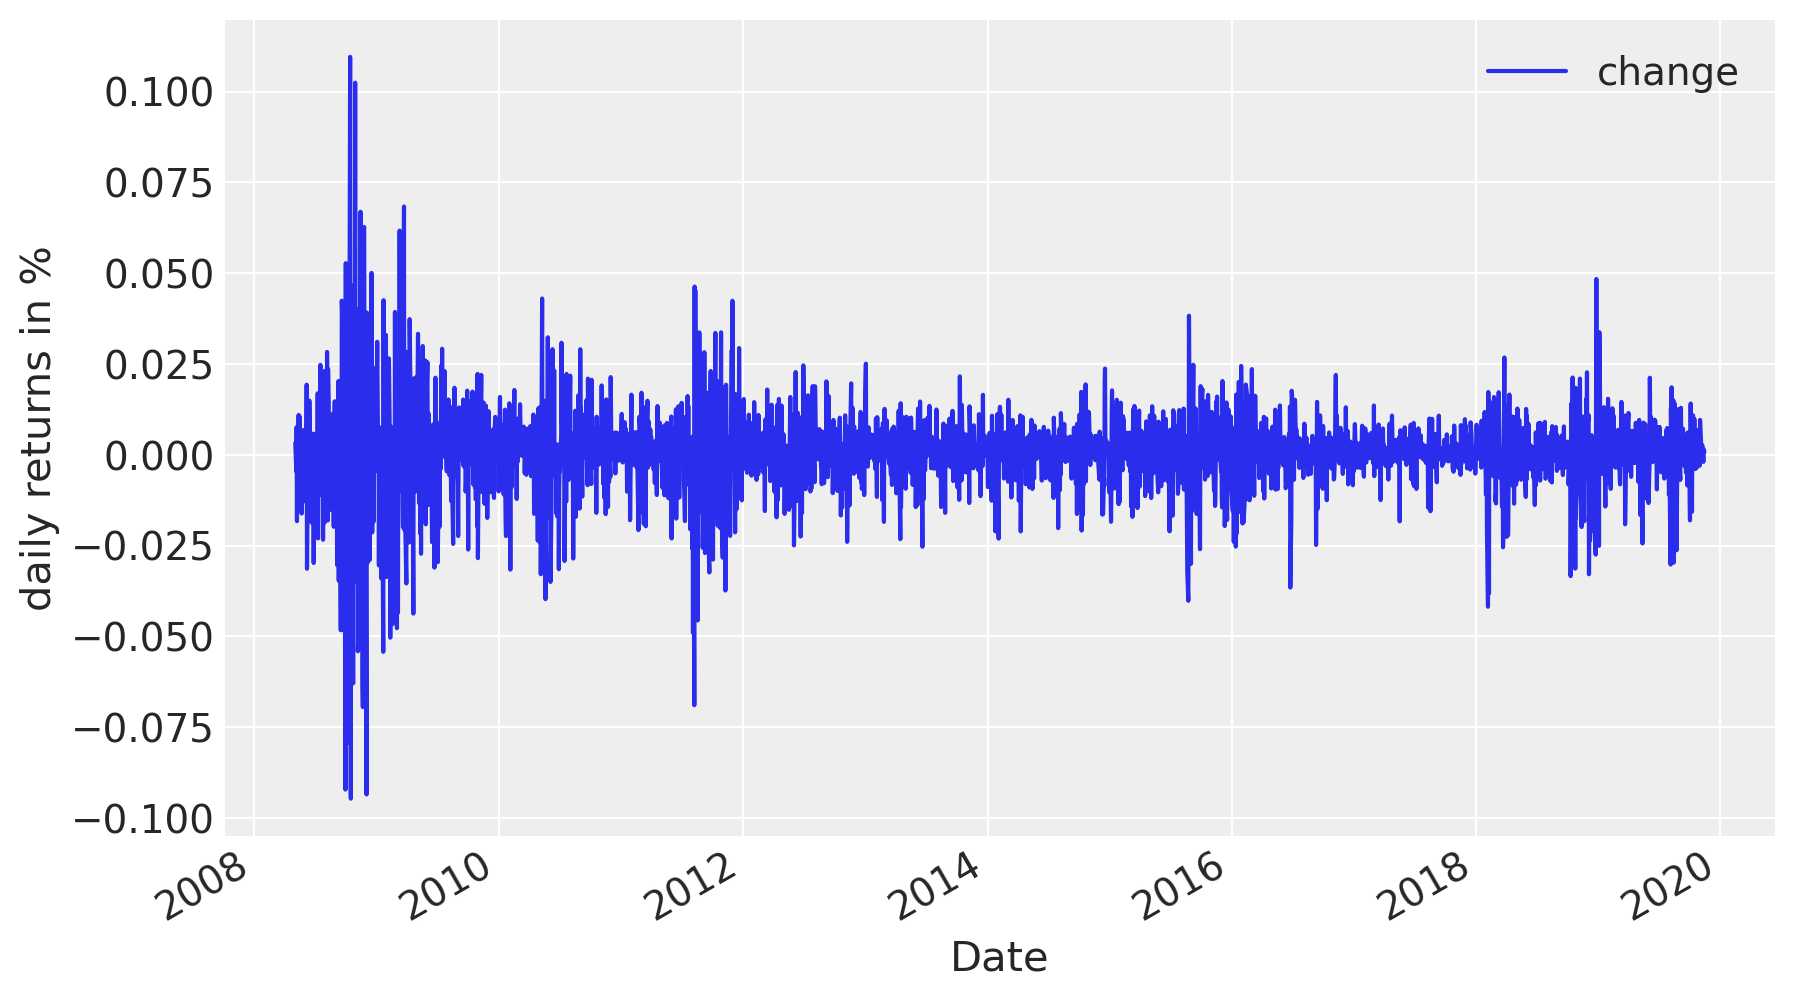

In [18]:
returns.plot(figsize=(10, 6))
plt.ylabel("daily returns in %");

In [26]:
sp500_model = pm.Model()
with sp500_model:
    # The model remembers the datetime index with the name 'date'
    change_of_returns = pm.Data("returns", returns["change"]) #this is the observed data
    data_shape = len(returns)
    
    nu = pm.Exponential("nu", lam=0.1, testval=5.0)
    sigma = pm.Exponential("sigma", lam=2, testval=0.5)
    
    s = pm.GaussianRandomWalk('s', sigma, shape=data_shape)
    volatility = pm.Deterministic("volatility",pm.math.exp(-2*s)** 0.5)
    
    r = pm.StudentT("r", nu=nu, sigma=volatility, observed=change_of_returns, shape=data_shape)

In [31]:
sp500_model.basic_RVs

[nu_log__, sigma_log__, s, r]

In [33]:
with sp500_model:
    trace = pm.sample(2000, init="adapt_diag")

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, sigma, nu]
Sampling 4 chains, 0 divergences: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [05:17<00:00, 31.49draws/s]
The number of effective samples is smaller than 10% for some parameters.


C:\ProgramData\Miniconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\ProgramData\Miniconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\ProgramData\Miniconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\ProgramData\Miniconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument bac

array([[<AxesSubplot:title={'center':'nu'}>,
        <AxesSubplot:title={'center':'nu'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

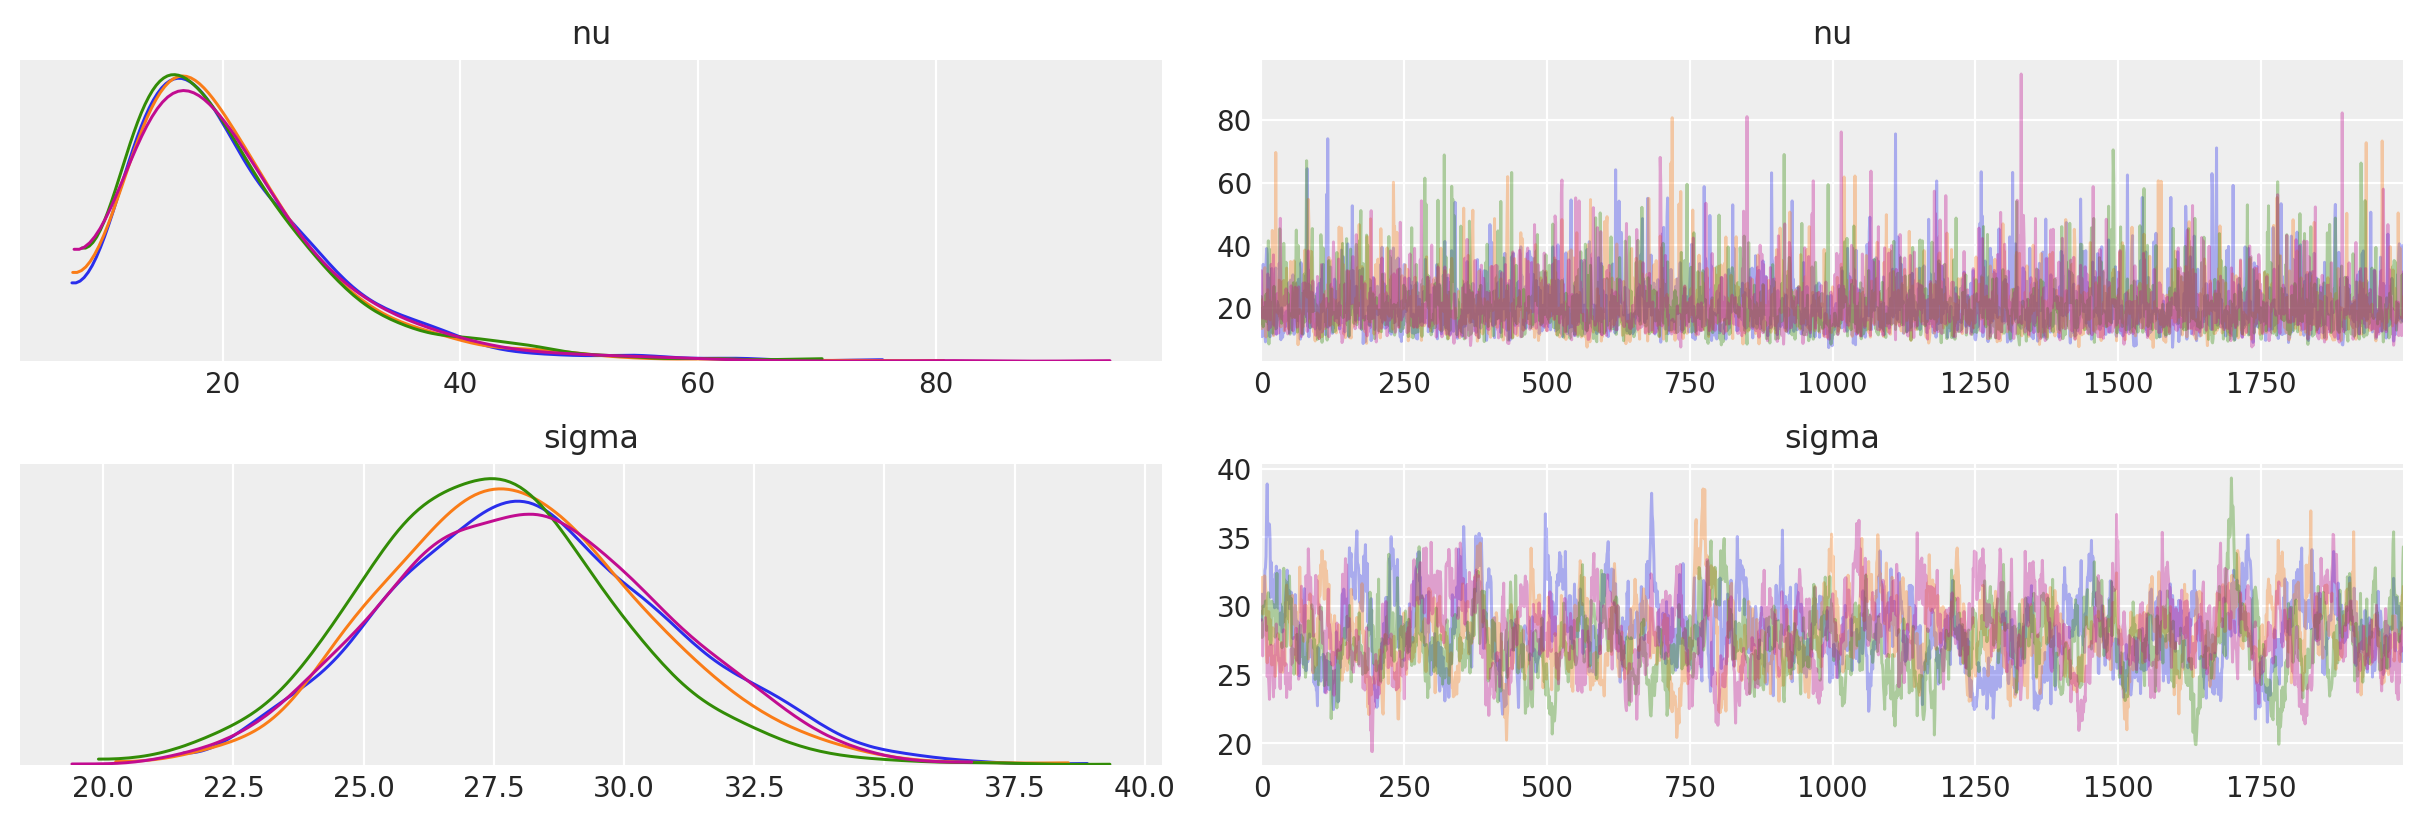

In [35]:

az.plot_trace(trace, var_names=["nu", "sigma"])

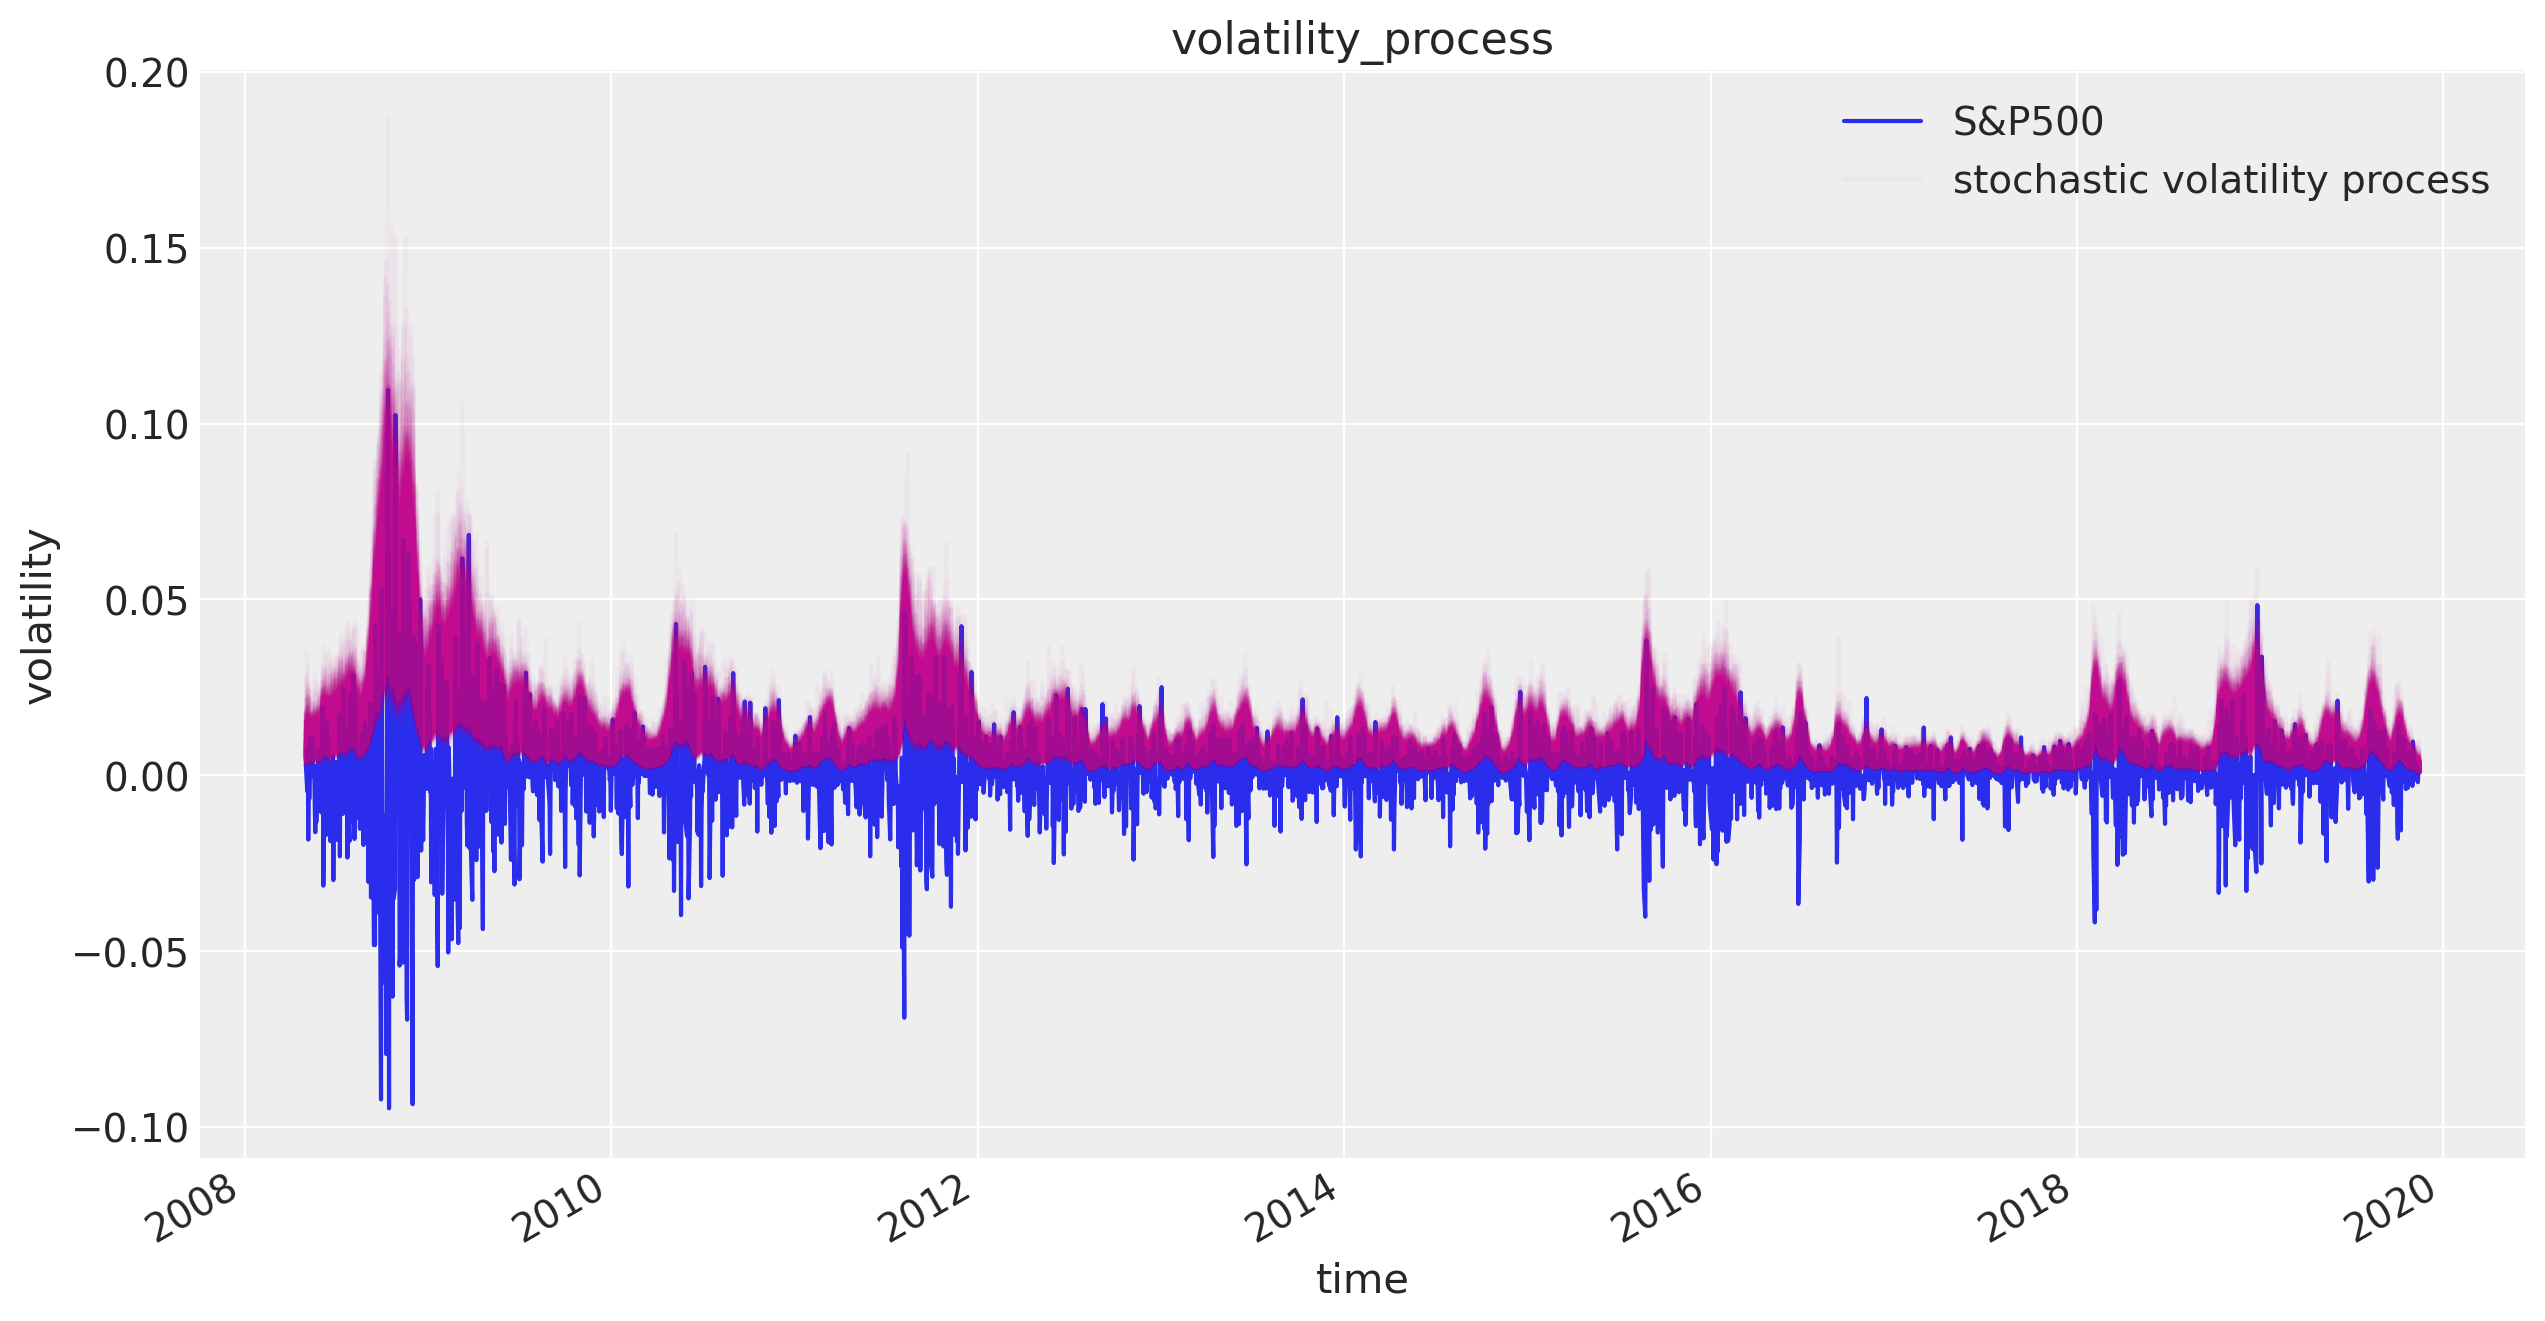

In [36]:

fig, ax = plt.subplots(figsize=(15, 8))
returns.plot(ax=ax)
ax.plot(returns.index, 1 / np.exp(trace["s", ::5].T), "C3", alpha=0.03)
ax.set(title="volatility_process", xlabel="time", ylabel="volatility")
ax.legend(["S&P500", "stochastic volatility process"], loc="upper right");